**Mainflow Task 2**

**Exploratory Data Analysis**


**Project 1: General EDA**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
superstore= pd.read_csv("/content/Global_Superstore_Dataset.csv")

In [3]:
superstore.head()


,Sales,Profit,Region,Product Category
0,240.70,168.26,Europe,Office Supplies
1,878.58,69.61,Europe,Technology
2,829.81,257.41,Africa,Technology
3,394.51,291.06,North America,Furniture
4,365.53,176.04,South America,Technology


In [4]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             500 non-null    float64
 1   Profit            500 non-null    float64
 2   Region            500 non-null    object 
 3   Product Category  500 non-null    object 
dtypes: float64(2), object(2)
memory usage: 15.8+ KB


In [5]:
# Handling missing values

superstore.isnull().sum()

,0
Sales,0
Profit,0
Region,0
Product Category,0


In [6]:
# Finding duplicates

superstore.duplicated().sum()

0

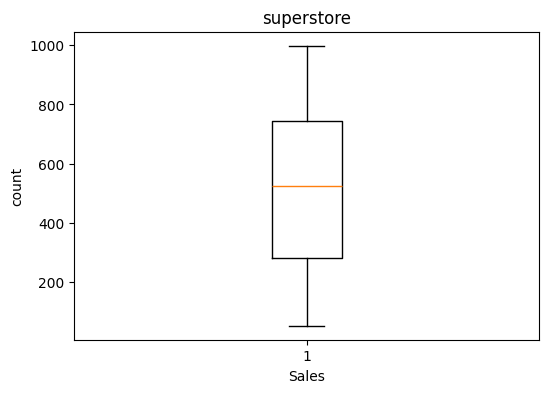

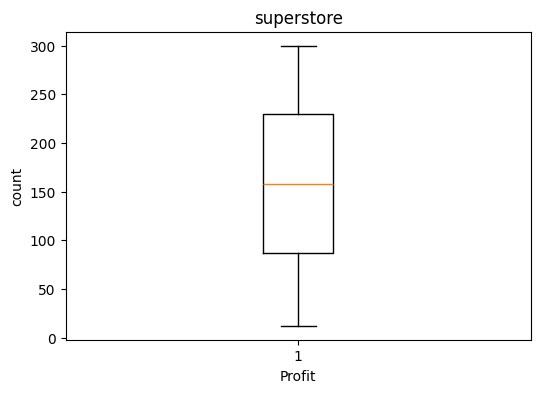

In [7]:
from re import X
# Detecting oulieres

for col in superstore:
  if (superstore[col].dtype == 'float64' or superstore[col].dtype == 'int64'):
    plt.figure(figsize=(6,4))
    plt.boxplot(superstore[col])
    plt.title("superstore")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

In [8]:
# Stastical analysis

# col=["profit","sales"]
for col in superstore:
  if superstore[col].dtype != 'object':
    superstore[col].describe()
    Mean=superstore[col].mean()
    Standard_deviance=superstore[col].std()
    Median=superstore[col].median()
    Variance=superstore[col].var



In [9]:
correlation = superstore[['Sales', 'Profit']].corr()
correlation

,Sales,Profit
Sales,1.000000,0.023435
Profit,0.023435,1.000000


In [10]:
Mean

157.36597999999998

In [11]:
Standard_deviance

82.34845566700744

In [12]:
Median

157.62

In [13]:
Variance()

6781.268150741091

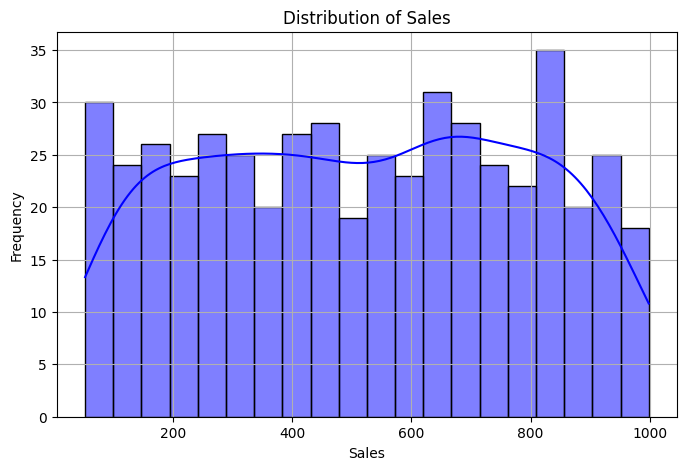

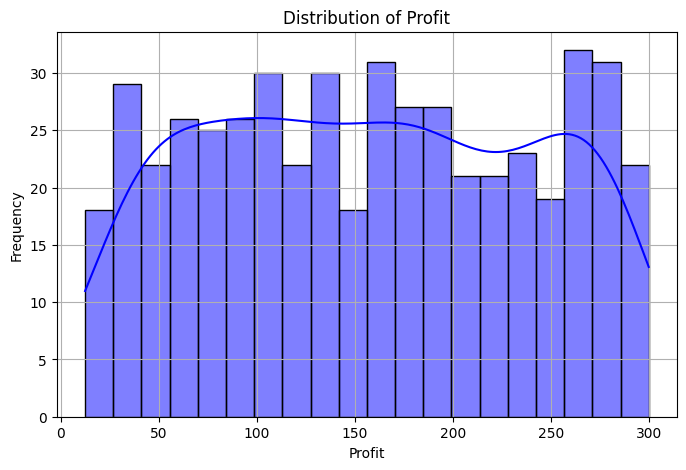

In [16]:
# Data Visualisation

# num_col=["Salary","Profit"]

# Create histograms for numerical columns
for col in superstore:
  if (superstore[col].dtype == 'float64' or superstore[col].dtype == 'int64'):
    plt.figure(figsize=(8, 5))
    sns.histplot(superstore[col], bins=20, kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             500 non-null    float64
 1   Profit            500 non-null    float64
 2   Region            500 non-null    int64  
 3   Product Category  500 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.8 KB


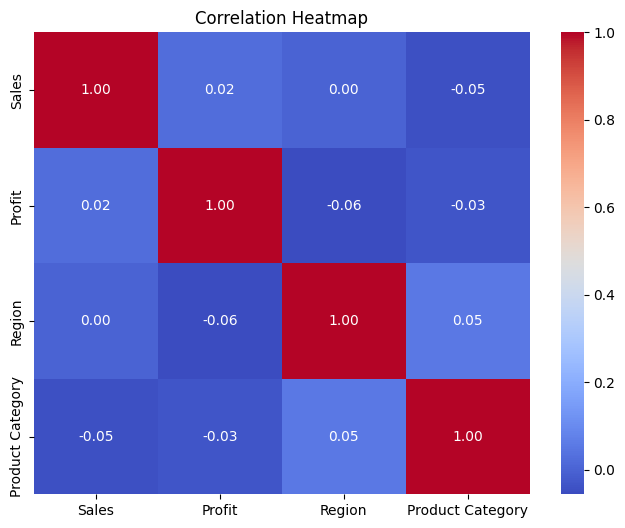

In [23]:
# Use heatmaps to visualize correlations and relationships between features.

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in superstore:
  if superstore[col].dtype == 'object':
    superstore[col]=le.fit_transform(superstore[col])

superstore.info()

correlation = superstore.corr()
correlation

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**Project 2: Sales Performance Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales_data=pd.read_csv("sales_data .csv")

In [4]:
sales_data.head()

,Product,Region,Sales,Profit,Discount,Category,Date
0,Pen,Europe,855.96,168.12,0.39,Office Supplies,2024-09-21
1,Printer,Africa,576.80,34.87,0.26,Technology,2024-03-09
2,Mouse,Europe,814.79,188.75,0.44,Technology,2024-11-03
3,Mouse,Europe,525.09,70.28,0.25,Furniture,2024-04-23
4,Laptop,Australia,615.75,190.97,0.27,Furniture,2024-01-28


In [5]:
sales_data.shape

(500, 7)

In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   500 non-null    object 
 1   Region    500 non-null    object 
 2   Sales     500 non-null    float64
 3   Profit    500 non-null    float64
 4   Discount  500 non-null    float64
 5   Category  500 non-null    object 
 6   Date      500 non-null    object 
dtypes: float64(3), object(4)
memory usage: 27.5+ KB


**Data Cleaning:**

In [7]:
A=sales_data.duplicated().sum()
print(f"Duplicate values are {A}")
B=sales_data.isnull().sum()
print(f"Null values are \n {B}")

Duplicate values are 0
Null values are 
 Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64


In [8]:
# sales_data["Date"]=sales_data["Date"].astype(datetime)
#                  OR
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

**Exploratory Data Analysis:**

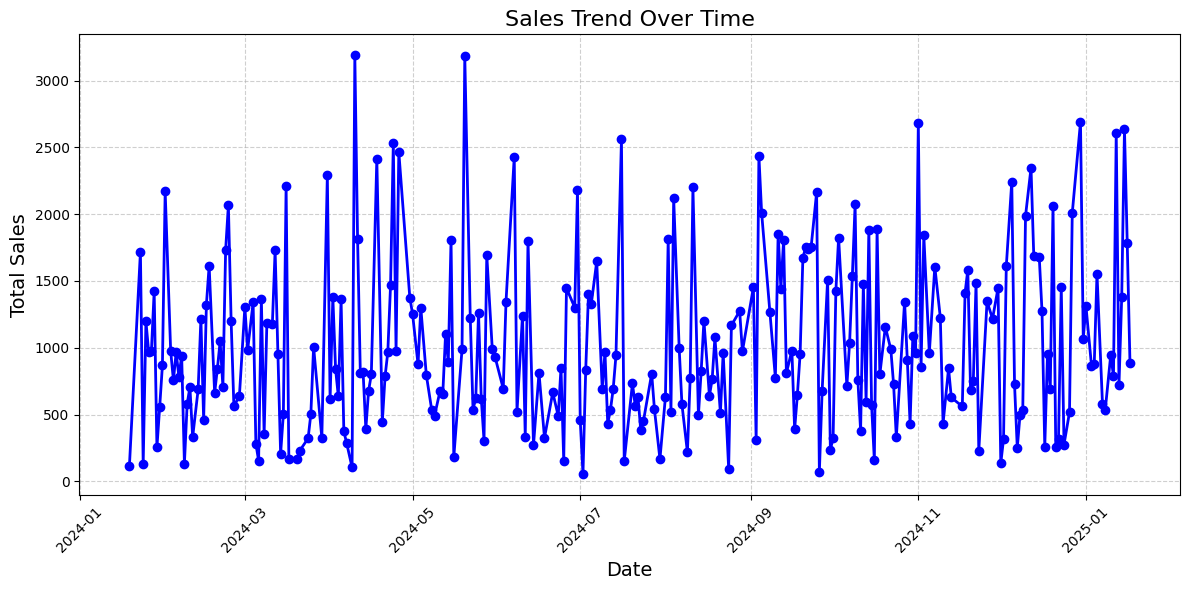

In [9]:
#  Group the data by date and sales per day sum up

sales_trend = sales_data.groupby('Date')['Sales'].sum().sort_index()
sales_trend

# Plot the time series graph

plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index, sales_trend.values, color='blue', marker='o', linestyle='-', linewidth=2)
plt.title("Sales Trend Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


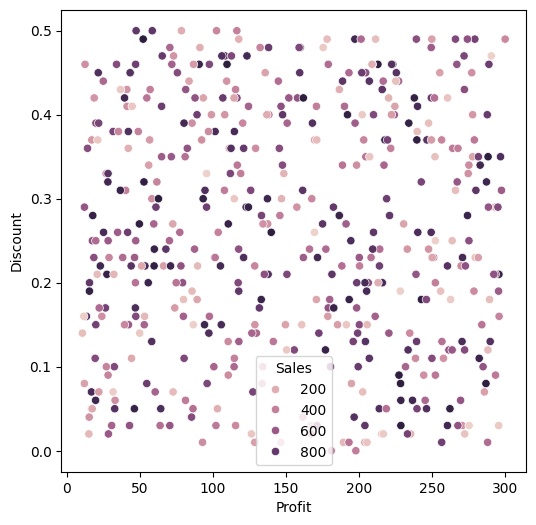

In [10]:
plt.figure(figsize=(6, 6), dpi=100)
scatter_plot= sns.scatterplot(x="Profit", y="Discount", hue="Sales", data = sales_data)

<ipython-input-11-760100d9c406>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')


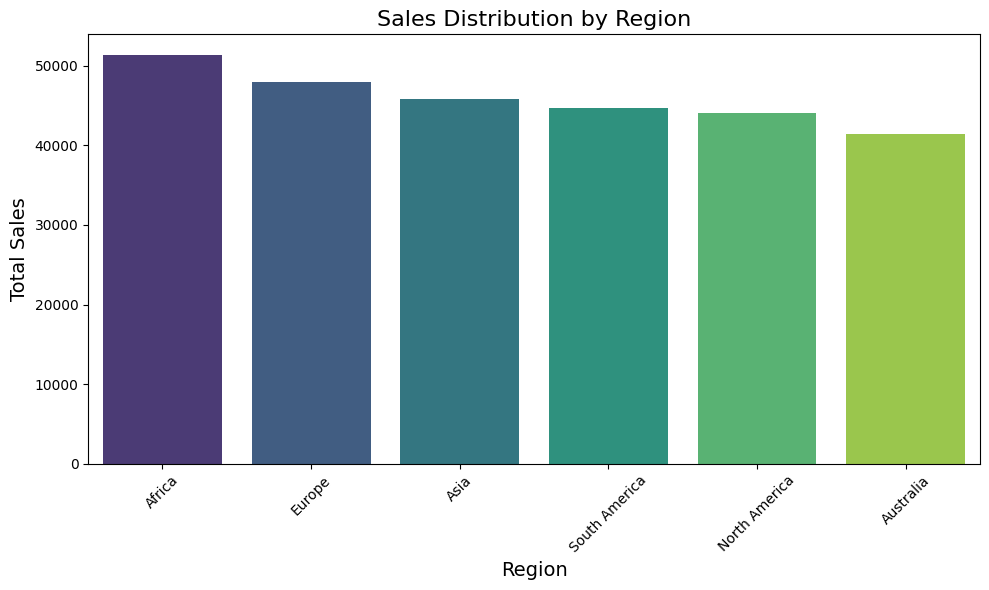

In [11]:
# Sales by region

plt.figure(figsize=(10, 6))
region_sales = sales_data.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')
plt.title("Sales Distribution by Region", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-12-cdeedeff98fa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='coolwarm')


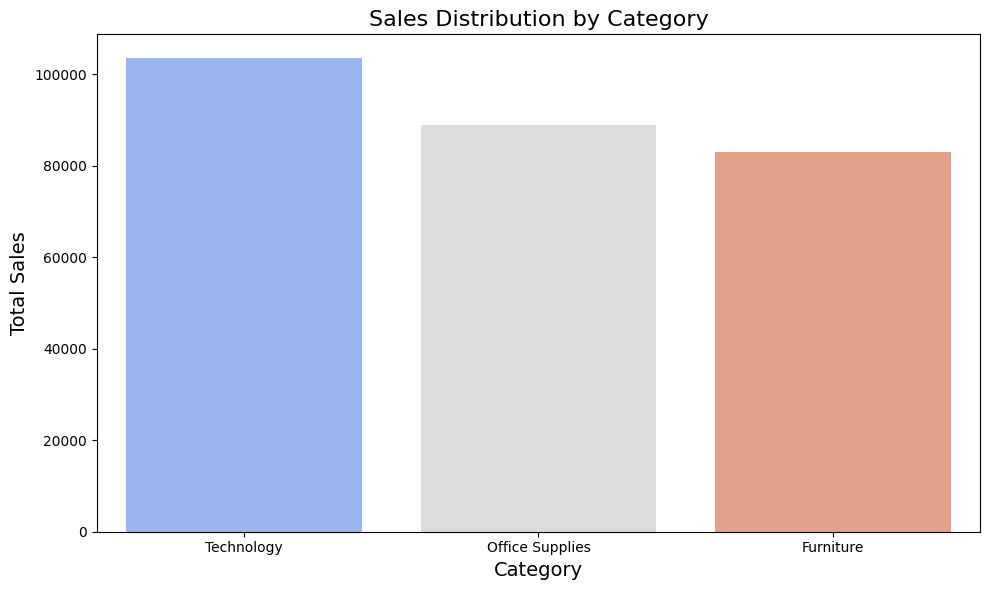

In [12]:
# Sales by Category

plt.figure(figsize=(10, 6))
category_sales = sales_data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values, palette='coolwarm')
plt.title("Sales Distribution by Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.tight_layout()
plt.show()


**Predictive Modeling:**

In [13]:
# Linear Regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
X=sales_data[["Discount","Profit"]]
Y=sales_data["Sales"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
print (f"X_train is : {X_train}")
print (f"X_test is : {X_test}")
print (f"Y_train is : {Y_train}")
print (f"Y_test is : {Y_test}")

X_train is :      Discount  Profit
249      0.29  157.48
433      0.44  225.15
19       0.20   79.28
322      0.25   28.34
332      0.42  237.84
..        ...     ...
106      0.07  285.80
270      0.42  220.27
348      0.22  200.40
435      0.16   24.05
102      0.10   32.58

[400 rows x 2 columns]
X_test is :      Discount  Profit
361      0.07   31.73
73       0.13  239.38
374      0.11  249.90
155      0.10  199.44
104      0.32   61.70
..        ...     ...
347      0.42   93.45
86       0.41  224.55
75       0.42   39.58
438      0.07   21.98
15       0.26  139.95

[100 rows x 2 columns]
Y_train is : 249    313.58
433    122.37
19     620.55
322    592.94
332    967.02
        ...  
106    258.81
270    176.63
348    412.61
435    333.25
102    693.70
Name: Sales, Length: 400, dtype: float64
Y_test is : 361     73.13
73     781.85
374    686.36
155    776.13
104    378.04
        ...  
347    237.47
86     245.83
75     915.03
438    270.68
15     990.72
Name: Sales, Length: 100,

In [16]:
# Representing LinearRegression as lm(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lm.fit()
lm.fit(X_train, Y_train)

LinearRegression()

In [18]:
# Predict on the test set
y_pred = lm.predict(X_test)
y_pred

array([533.82936343, 509.17097202, 504.36092187, 511.06092398,
       567.56969351, 531.60670778, 582.51917311, 519.62609969,
       522.39054538, 580.95143707, 571.68988104, 523.81649637,
       590.84509152, 535.77335117, 565.45881928, 529.0379714 ,
       552.16862072, 548.07617517, 559.12587347, 537.27861376,
       518.71064272, 588.71852279, 555.82629262, 530.33804337,
       521.63858816, 551.37767601, 556.2302677 , 566.64975038,
       504.96586873, 504.08411818, 539.93821177, 584.80947174,
       495.46927423, 542.38864907, 565.35492229, 506.33259582,
       544.46946389, 556.97834777, 550.71781702, 586.44553413,
       486.78289156, 585.32682512, 582.41525754, 574.79358528,
       572.34512373, 512.32540673, 560.99847828, 508.71894418,
       591.5827024 , 530.55370318, 543.96031803, 488.61599282,
       564.25610801, 581.91029333, 555.37819769, 574.45339462,
       542.99072525, 564.31206378, 538.01103653, 583.13914968,
       566.18470577, 559.08500318, 571.57251405, 504.84

In [19]:
# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

In [22]:
# Display results
print("Linear Regression Model")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Linear Regression Model
Mean Squared Error: 82975.51
R-squared: -0.05
